In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [2]:
main_df = pd.read_csv('E:/Data Analytics/workshop/ABD vs Bumrah-20220218T052448Z-001/ABD vs Bumrah/IPL_ball_by_ball_updated.csv')

In [3]:
main_df.dtypes


match_id                  int64  
season                    int64  
start_date                object 
venue                     object 
innings                   int64  
ball                      float64
batting_team              object 
bowling_team              object 
striker                   object 
non_striker               object 
bowler                    object 
runs_off_bat              int64  
extras                    int64  
wides                     float64
noballs                   float64
byes                      float64
legbyes                   float64
penalty                   float64
wicket_type               object 
player_dismissed          object 
other_wicket_type         float64
other_player_dismissed    float64
dtype: object

In [4]:
main_df.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,6.8,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,AB Agarkar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
main_df = main_df[(main_df.innings == 1) | (main_df.innings == 2)]
Dhoni_df = main_df[main_df.striker == 'MS Dhoni']
Dhoni_df = Dhoni_df[(main_df.wides != 1.)]
Dhoni_df = Dhoni_df[(main_df.wides != 2.)]
Dhoni_df = Dhoni_df[(main_df.wides != 3.)]
Dhoni_df = Dhoni_df[(main_df.wides != 5.)]

In [6]:
Dhoni_df.ball.count() , Dhoni_df.runs_off_bat.sum(), Dhoni_df.runs_off_bat.sum()/Dhoni_df.ball.count()

(3494, 4746, 1.3583285632512878)

In [7]:
Dhoni_df_runs_by_year = pd.DataFrame(Dhoni_df.groupby('season')['runs_off_bat'].sum()).sort_values(by = ['season'] , ascending=True).reset_index()
Dhoni_df_balls_by_year = pd.DataFrame(Dhoni_df.groupby('season')['ball'].count()).sort_values(by = ['season'] , ascending=True).reset_index()
Dhoni_df_dismiss_by_year = pd.DataFrame(Dhoni_df.groupby('season')['player_dismissed'].count()).sort_values(by = ['season'] , ascending=True).reset_index()
Dhoni_df_by_each_year = Dhoni_df_runs_by_year.merge(Dhoni_df_balls_by_year , on = 'season' , how = 'left')
Dhoni_df_by_each_year['Strike_rate'] = 100* Dhoni_df_by_each_year.runs_off_bat/Dhoni_df_by_each_year.ball
Dhoni_df_by_each_year = Dhoni_df_by_each_year.merge(Dhoni_df_dismiss_by_year , on = 'season' , how = 'left')
Dhoni_df_by_each_year = Dhoni_df_by_each_year.rename(columns={"player_dismissed":"number of times dismissed"})

In [8]:
Dhoni_df_by_each_year

,season,runs_off_bat,ball,Strike_rate,number of times dismissed
0,2008,414,310,133.548387,11
1,2009,332,261,127.203065,8
2,2010,287,210,136.666667,9
3,2011,392,247,158.704453,11
4,2012,358,278,128.776978,11
5,2013,461,283,162.897527,12
6,2014,371,250,148.400000,6
7,2015,372,305,121.967213,16
8,2016,284,210,135.238095,8
9,2017,290,250,116.000000,13


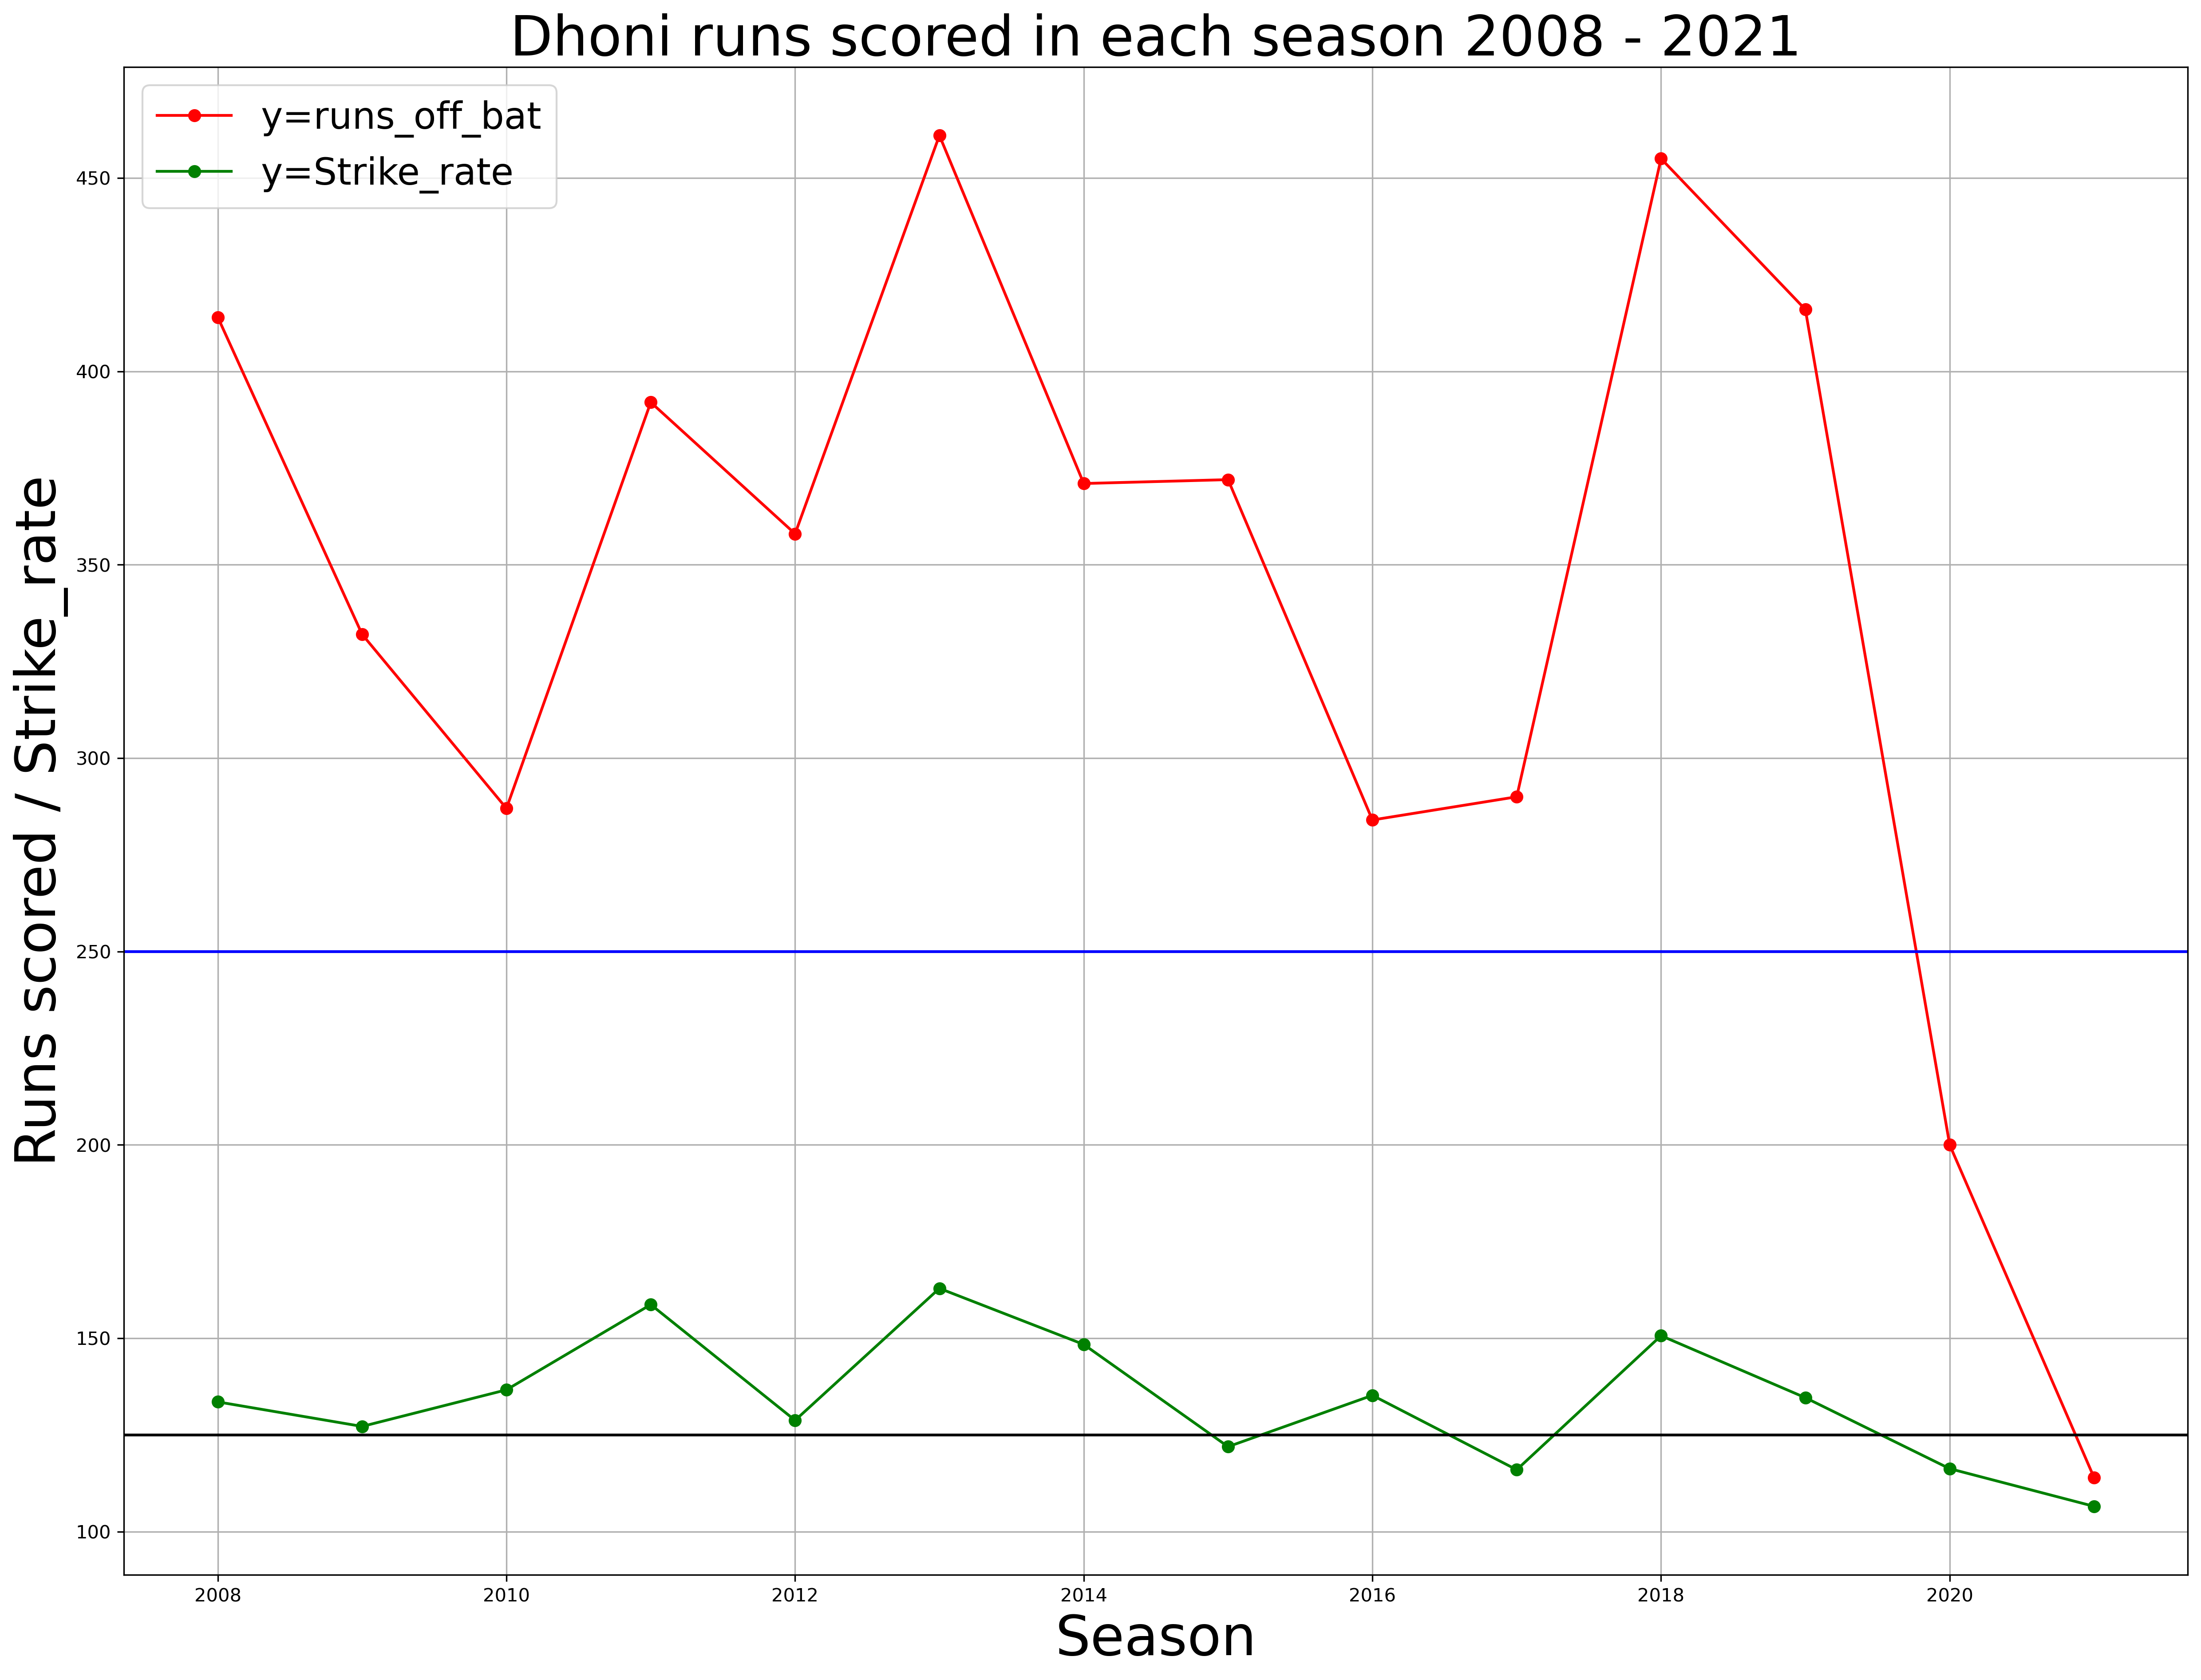

In [9]:
plt.figure(figsize = (20,15),dpi=300)
# plt.legend(['label1', 'label2'])
plt.plot(Dhoni_df_by_each_year.season,Dhoni_df_by_each_year.runs_off_bat, color='red', marker='o')
plt.plot(Dhoni_df_by_each_year.season,Dhoni_df_by_each_year.Strike_rate, color='green', marker='o')
plt.legend(["y=runs_off_bat", "y=Strike_rate" ], loc =2 , fontsize = 20)
plt.axhline(250, ls = '-', color = 'blue')
plt.axhline(125, ls = '-', color = 'black')
plt.xlabel('Season',fontsize = 30)
plt.ylabel('Runs scored / Strike_rate', fontsize = 30)
plt.title('Dhoni runs scored in each season 2008 - 2021', fontsize = 30)
plt.grid(True)
plt.show()


Based on above analysis, Dhoni is not consistent in last two seasons. According to previous batting analysis dhoni is not good enough to bat in upcoming season.